# Reading and understanding the data

In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [412]:
cancer_df = pd.read_csv('breast-cancer-wisconsin.csv')
cancer_df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [413]:
cancer_df.columns=['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class']

In [414]:
cancer_df.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [415]:
#let's check the shape
cancer_df.shape

(699, 11)

In [416]:
#checking the info

cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_of_Cell_Size      699 non-null    int64 
 3   Uniformity_of_Cell_Shape     699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


##### Bare Nuclei data type is object, it means it has some irregularites, lets check this out.

In [417]:
cancer_df['Bare_Nuclei'].value_counts(normalize=True)

1     0.575107
10    0.188841
2     0.042918
5     0.042918
3     0.040057
8     0.030043
4     0.027182
?     0.022890
9     0.012876
7     0.011445
6     0.005722
Name: Bare_Nuclei, dtype: float64

In [418]:
# we can see the '?' has 2 percent of the data, which is very small and can be dropped.
cancer_df = cancer_df[cancer_df['Bare_Nuclei'] != '?']
cancer_df['Bare_Nuclei'].value_counts(normalize=True)

1     0.588580
10    0.193265
2     0.043924
5     0.043924
3     0.040996
8     0.030747
4     0.027818
9     0.013177
7     0.011713
6     0.005857
Name: Bare_Nuclei, dtype: float64

In [419]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           683 non-null    int64 
 1   Clump_Thickness              683 non-null    int64 
 2   Uniformity_of_Cell_Size      683 non-null    int64 
 3   Uniformity_of_Cell_Shape     683 non-null    int64 
 4   Marginal_Adhesion            683 non-null    int64 
 5   Single_Epithelial_Cell_Size  683 non-null    int64 
 6   Bare_Nuclei                  683 non-null    object
 7   Bland_Chromatin              683 non-null    int64 
 8   Normal_Nucleoli              683 non-null    int64 
 9   Mitoses                      683 non-null    int64 
 10  Class                        683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [420]:
cancer_df['Bare_Nuclei'] = pd.to_numeric(cancer_df['Bare_Nuclei'])

In [421]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample_code_number           683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Uniformity_of_Cell_Size      683 non-null    int64
 3   Uniformity_of_Cell_Shape     683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


#### now we can see 'Bare Nuclei' has int64 datatype

In [422]:
#lets check the shape

cancer_df.shape

(683, 11)

In [423]:
cancer_df.Class.value_counts(normalize=True)

2    0.650073
4    0.349927
Name: Class, dtype: float64

In [424]:
# we do not need the Sample code number, hence we can drop them

cancer_df.drop('Sample_code_number', axis=1, inplace=True)

In [425]:
cancer_df.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# Visualizing the data

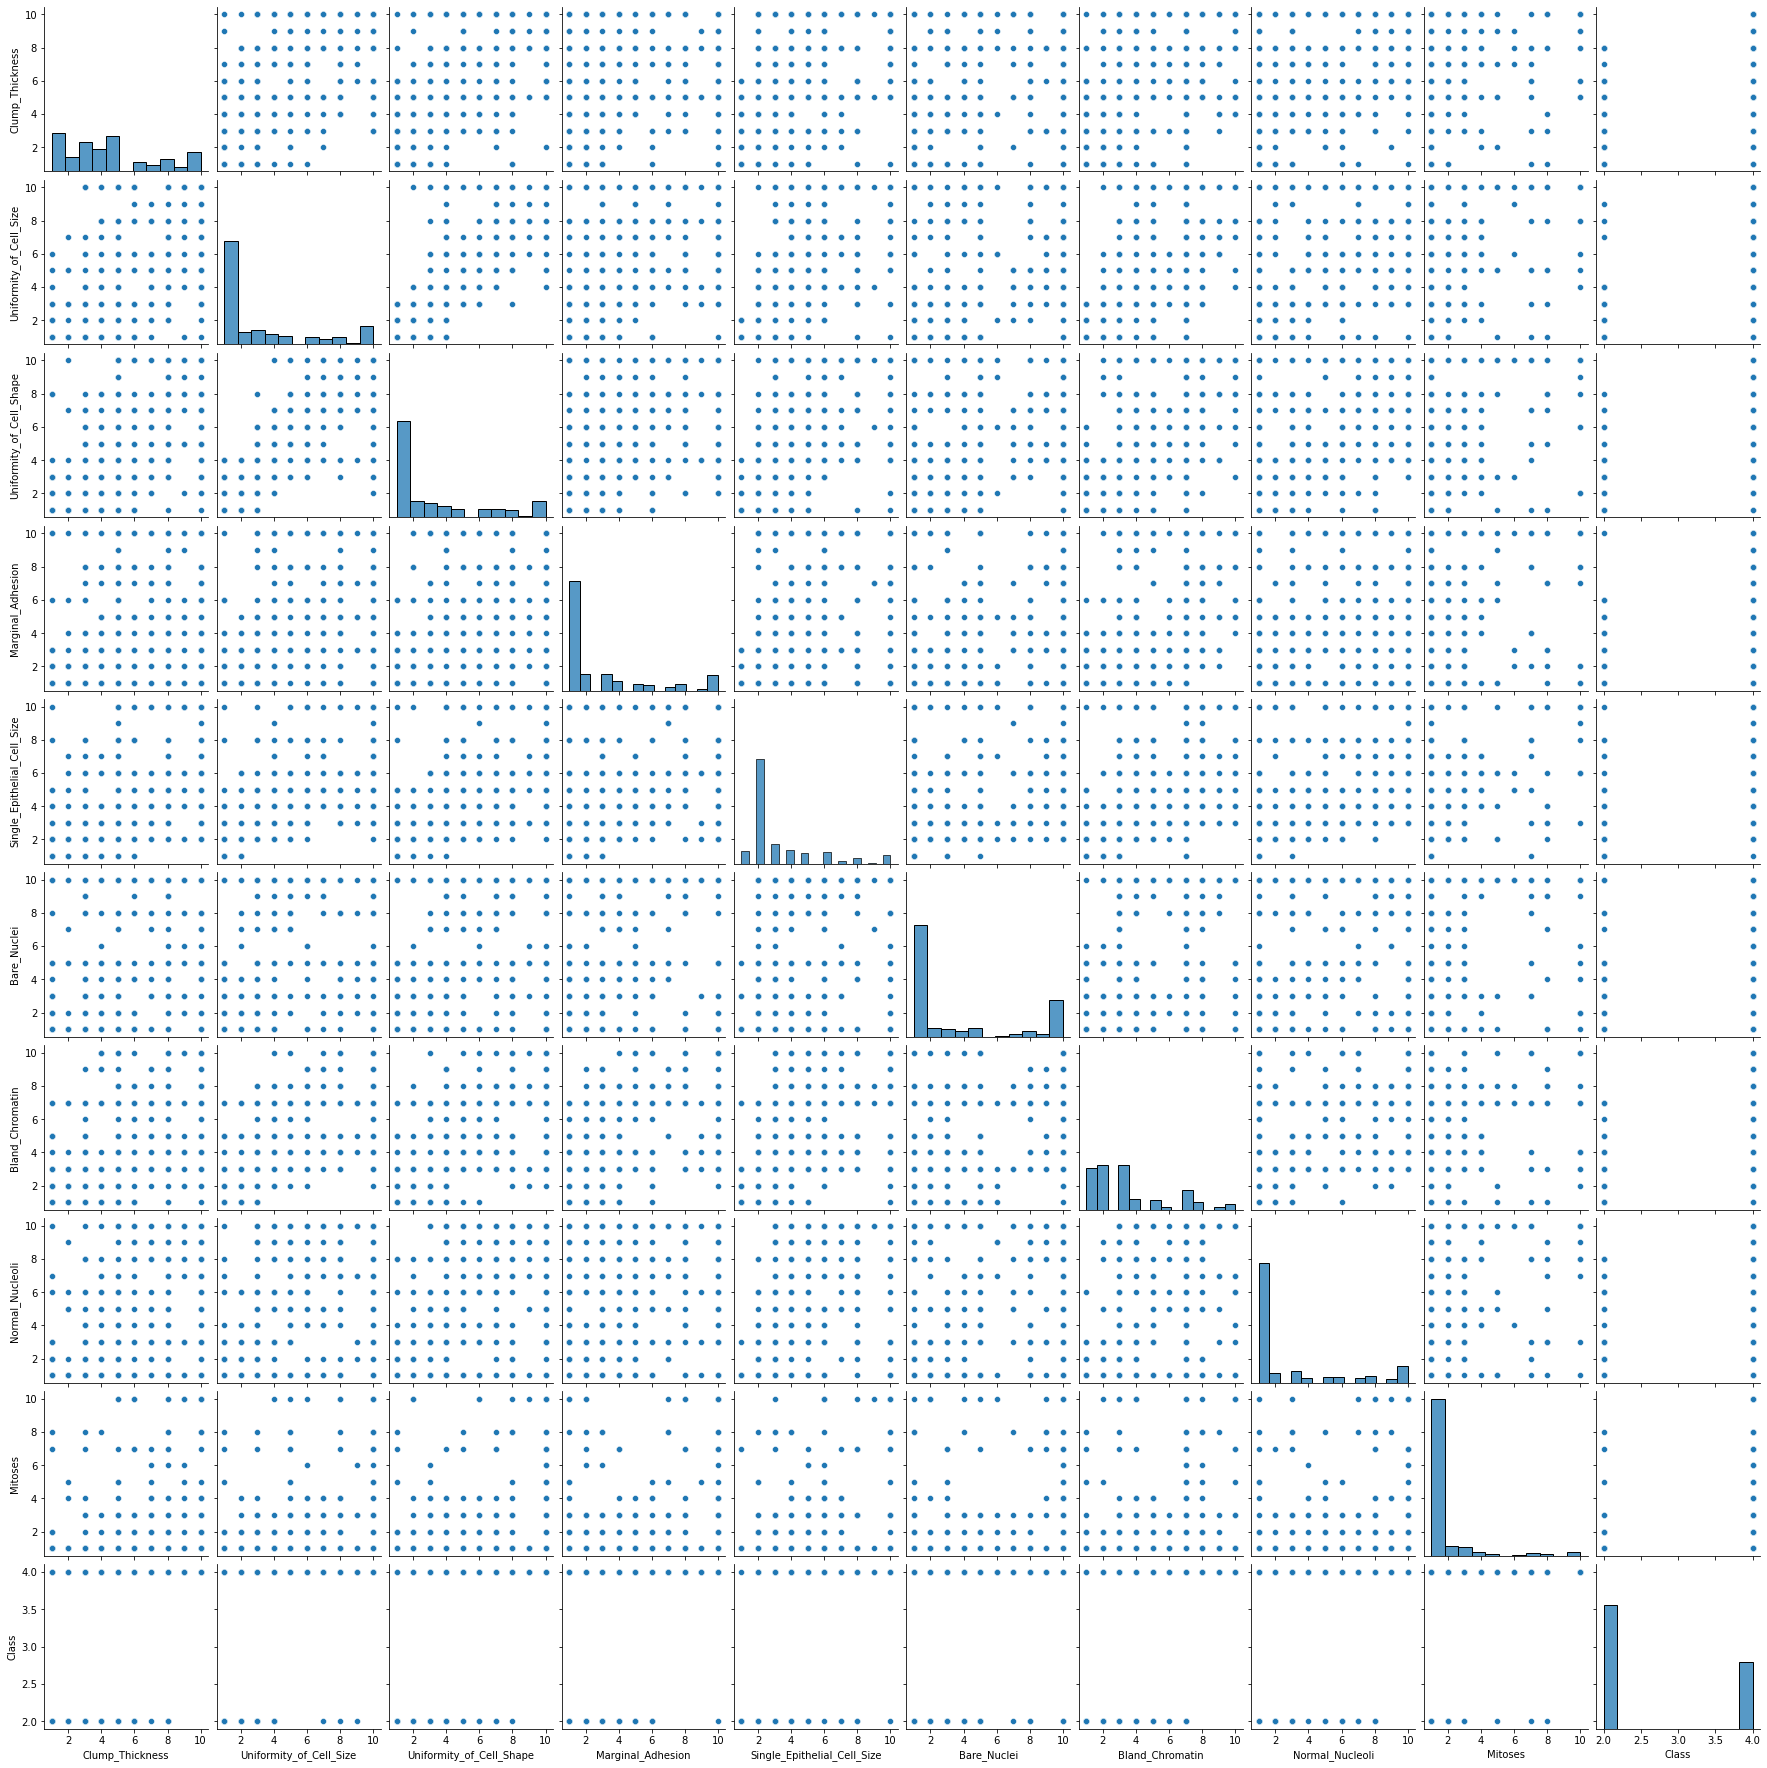

In [426]:
# All the data are categorical data we need to plot the box plot
sns.pairplot(cancer_df)
plt.show()

In [427]:
cancer_df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [428]:
#lest conver the class 2 and class 4 to labeled categorical variables

# def binary_map(x):
#     return x.map({2:'benign', 4:'malignant'})

cancer_df['Class'] =cancer_df['Class'].map({2:0, 4:1})
cancer_df['Class']

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 683, dtype: int64

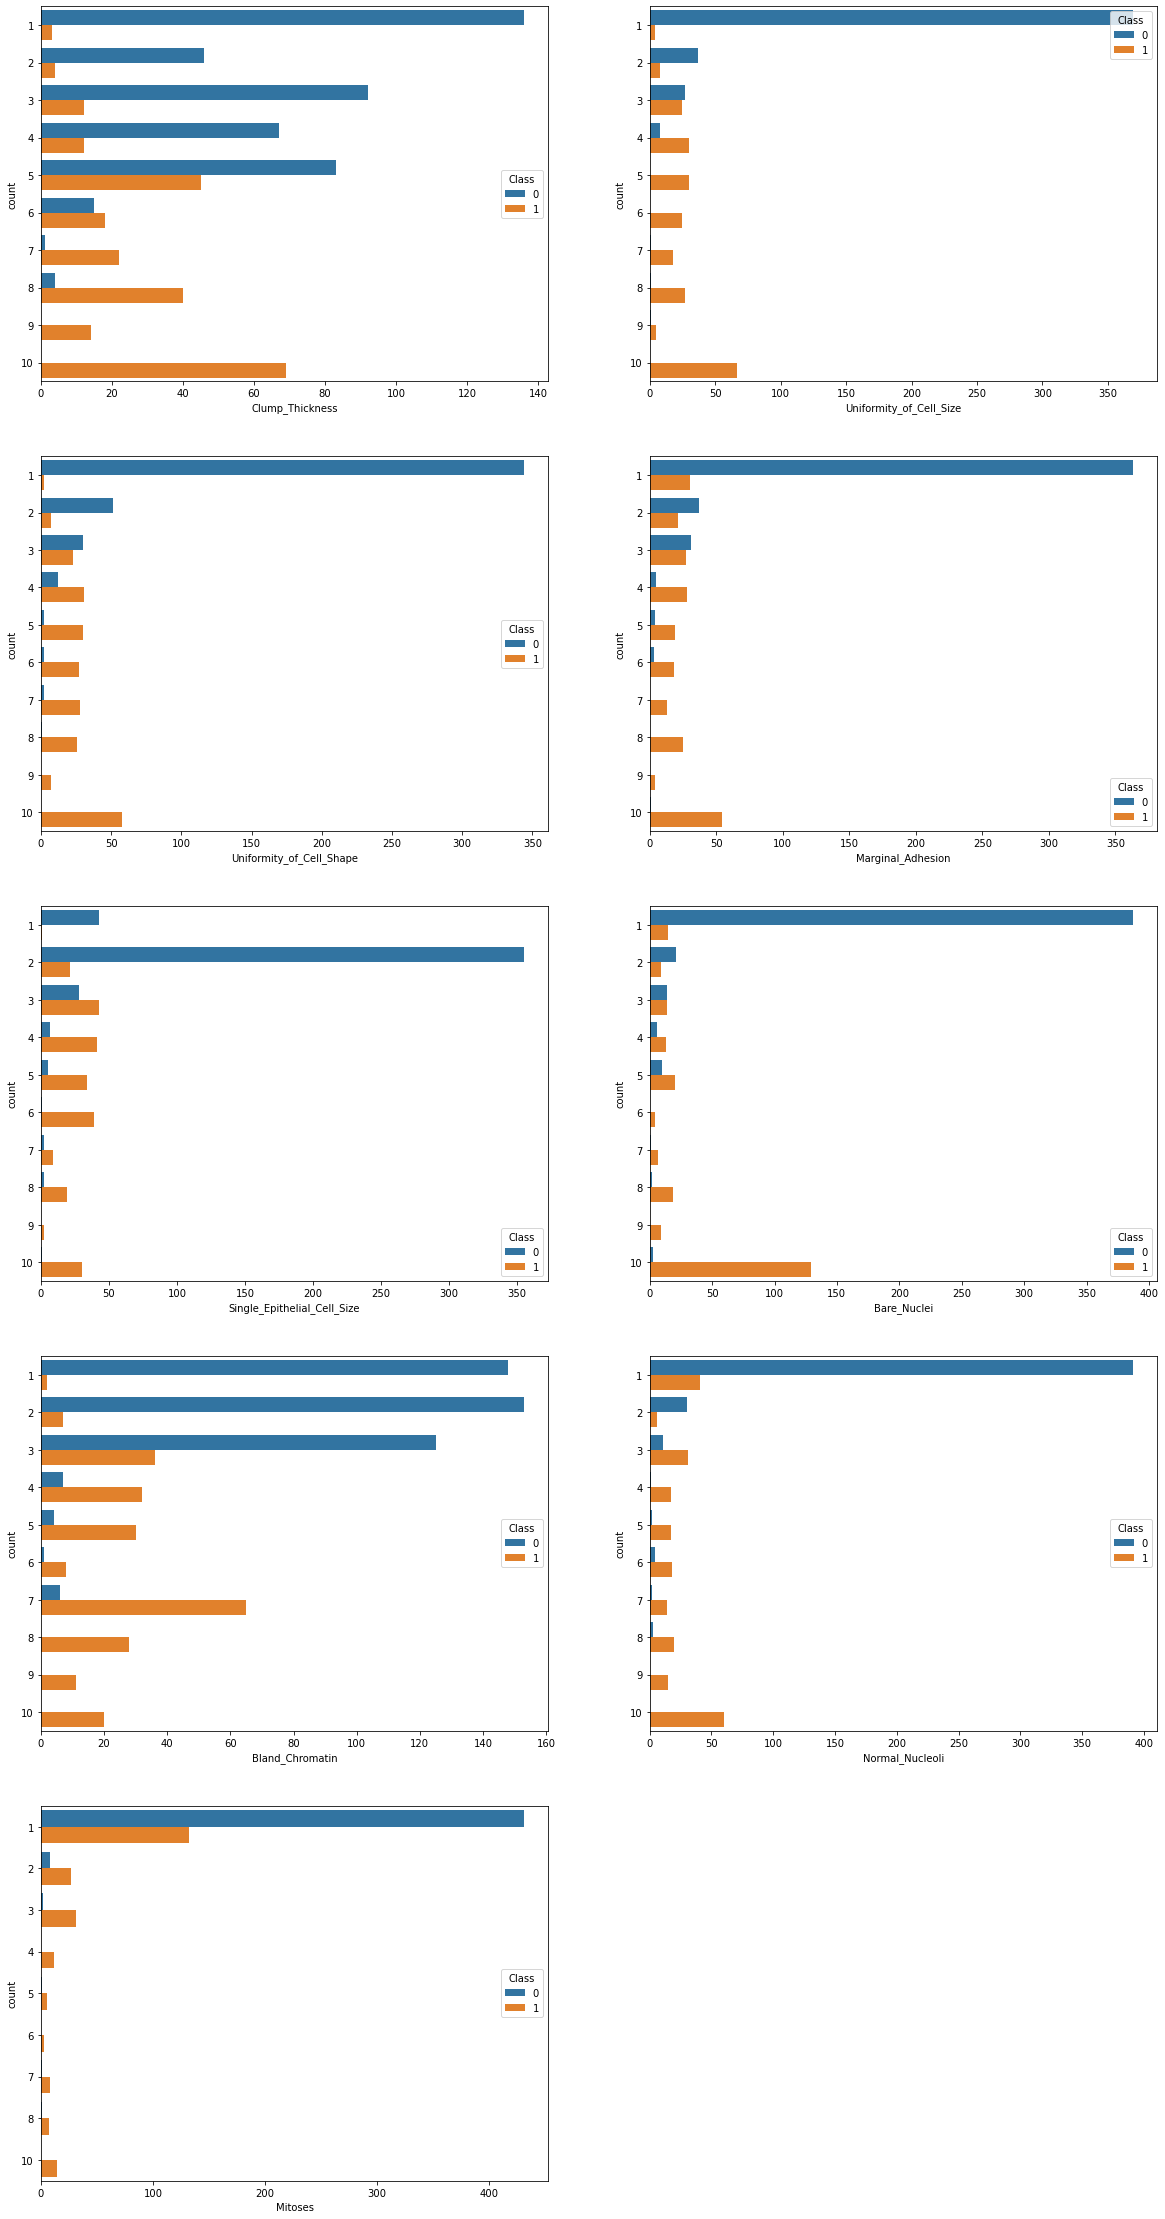

In [429]:
plt.figure(figsize=[20,40])

col = np.array(cancer_df.columns)
for i in range(0,len(col)-1):
    plt.subplot(5,2,i+1)
    cplt = sns.countplot(y=col[i], data=cancer_df, hue='Class')
    plt.xlabel(col[i])
    plt.ylabel('count')

newFig =cplt.get_figure()
newFig.savefig("count_plot_cancer.jpg")

### Conclusion

* clump Thickness is less than 6 it looks like stage 2 of cancer and greater than 6 then it is malignant
* Uniformity of cell size - if the value is less than 2 then it is benign, value 3 values have 50-50 spread with both the classes. if the vlaue is >= 4 then its malignant.
* Uniformity of cell shape = for value one, benign class dominates and decreases drastically, then after value 5, its all malignant class.
* Marginal Adhesion - benign class can be seen if the value is less than 6, malignant class can be seen on at all the levels of the values.
* single epithelial cell size - 

In [430]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [431]:
#lets split the data

y= cancer_df['Class']

x = cancer_df.drop(labels='Class', axis=1)

x.head()
print(y)


0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 683, dtype: int64


In [432]:
#now split the data into test and train

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100 )

<AxesSubplot:>

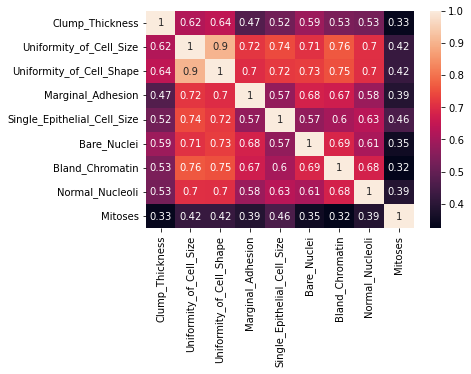

In [433]:
#after spliting the data, now check the correlation using heat map

sns.heatmap(x_train.corr(), annot=True)

Obesrvaitons,

* Cell shape and cell size have a very high correlation when compared to others
* Bland_chromatin and cell size and shape, has the next high co-relation
* Looks like, most of the indepentent variables are highly co-related with cell size and shape.

<Figure size 720x576 with 0 Axes>

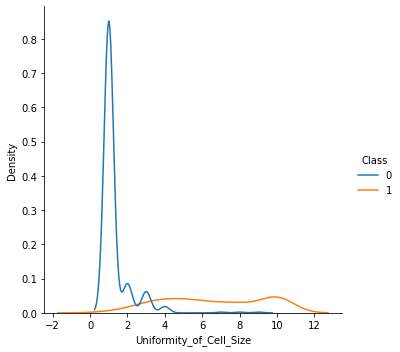

In [434]:
plt.figure(figsize=[10,8])

sns.displot(data=cancer_df, x='Uniformity_of_Cell_Size', hue='Class', kind='kde')
plt.show()

In [435]:
import statsmodels.api as sm

In [436]:
log_model = sm.GLM(y_train,(sm.add_constant(x_train)), family=sm.families.Binomial())
log_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                  478
Model:                            GLM   Df Residuals:                      468
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33.216
Date:                Wed, 08 Feb 2023   Deviance:                       66.433
Time:                        12:50:56   Pearson chi2:                     660.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6825
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -10.6759      1.591     -6.710      0.000     -13.794      -7.558
Clump_Thickness                 0.6134      0.178      3.443      0.001       0.264       0.962
Uniformity_of_Cell_Size         0.1123      0.274      0.410      0.682      -0.425       0.650
Uniformity_of_Cell_Shape        0.2379      0.298      0.798      0.425      -0.346       0.822
Marginal_Adhesion               0.3714      0.179      2.071      0.038       0.020       0.723
Single_Epithelial_Cell_Size     0.0445      0.181      0.245      0.806      -0.311       0.400
Bare_Nuclei                     0.3091      0.115      2.682      0.007       0.083       0.535
Bland_Chromatin                 0.3968      0.200      1.983      0.047       0.005       0.789
Normal_Nucleoli                 0.2919      0.144      2.022      0.043       0.009       0.575
Mitoses                         0.7196      0.357      2.016      0.044       0.020       1.419
===============================================================================================
"""

In [437]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [438]:
from sklearn.feature_selection import RFE
log_reg_rfe = RFE(log_reg, step=15)
rfe = log_reg_rfe.fit(x_train, y_train)

In [439]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Clump_Thickness', True, 1),
 ('Uniformity_of_Cell_Size', False, 2),
 ('Uniformity_of_Cell_Shape', False, 2),
 ('Marginal_Adhesion', True, 1),
 ('Single_Epithelial_Cell_Size', False, 2),
 ('Bare_Nuclei', False, 2),
 ('Bland_Chromatin', True, 1),
 ('Normal_Nucleoli', False, 2),
 ('Mitoses', True, 1)]

In [440]:
supported_cols = list(x_train.columns[rfe.support_])

In [441]:
#now build the model with these columns

x_train_rfe = sm.add_constant(x_train[supported_cols])

log_md1 = sm.GLM(y_train, x_train_rfe, family=sm.families.Binomial())
res = log_md1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                  478
Model:                            GLM   Df Residuals:                      473
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -49.879
Date:                Wed, 08 Feb 2023   Deviance:                       99.758
Time:                        12:50:56   Pearson chi2:                 1.99e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6595
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -11.2330      1.337     -8.401      0.000     -13.854      -8.612
Clump_Thickness       0.9254      0.148      6.262      0.000       0.636       1.215
Marginal_Adhesion     0.6617      0.141      4.687      0.000       0.385       0.938
Bland_Chromatin       0.9071      0.180      5.041      0.000       0.554       1.260
Mitoses               0.8459      0.305      2.770      0.006       0.247       1.445
=====================================================================================
"""

All the values are have the p-value are zero, hence we check the variance

In [442]:
y_train_pred = res.predict(x_train_rfe).values.reshape(-1)
y_train_pred

y_zip = pd.DataFrame(zip(y_train_pred, y_train, range(0,len(y_train_pred))))
y_zip.columns = ["y_train_pred", "y_train", "index"]
y_zip

,y_train_pred,y_train,index
0,0.999662,1,0
1,0.996645,1,1
2,0.000373,0,2
3,0.002286,0,3
4,0.999701,1,4
...,...,...,...
473,0.014903,0,473
474,0.972709,1,474
475,0.005747,0,475
476,0.027981,0,476


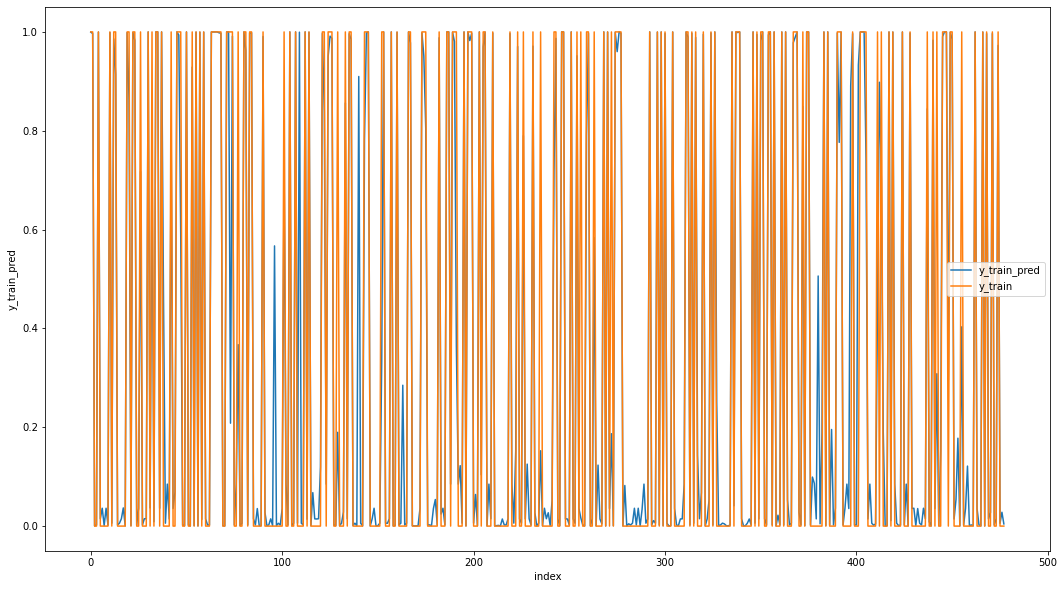

In [443]:
plt.figure(figsize=[18,10])
sns.lineplot(data=y_zip, x='index', y="y_train_pred")
sns.lineplot(data=y_zip, x="index", y="y_train")
# plt.plot(y_train, label="y_train")
plt.legend(["y_train_pred","y_train"])
plt.show()

#this fig doesn't say anything, I think its a waste because, we have just sorted without mapping.


In [444]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [445]:
y_zip['Predicted_score'] = y_zip.y_train_pred.map(lambda x: 1 if x >0.5 else 0)
y_zip.head()

,y_train_pred,y_train,index,Predicted_score
0,0.999662,1,0,1
1,0.996645,1,1,1
2,0.000373,0,2,0
3,0.002286,0,3,0
4,0.999701,1,4,1


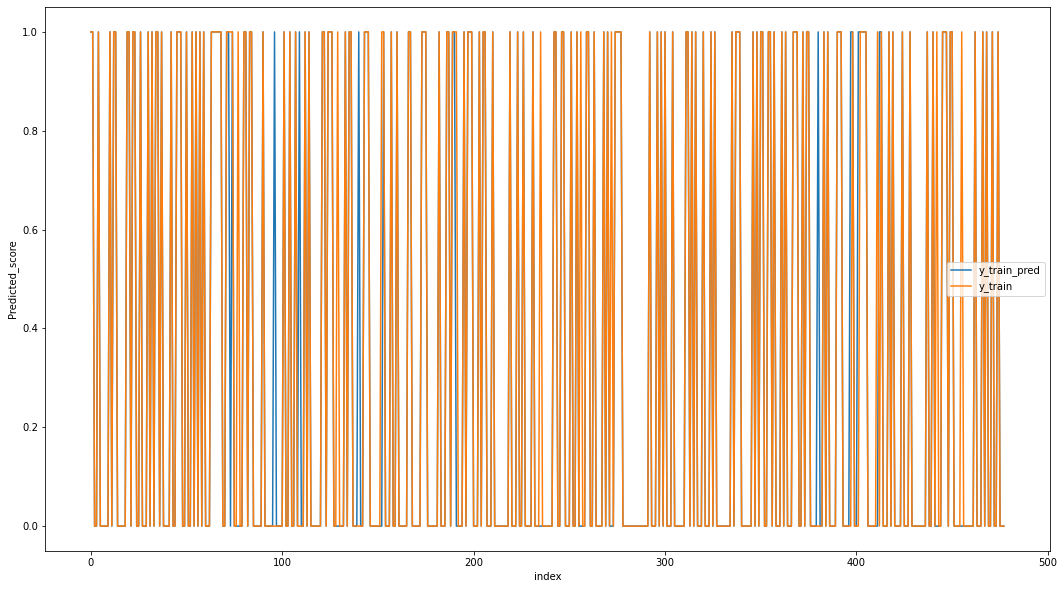

In [446]:
plt.figure(figsize=[18,10])
sns.lineplot(data=y_zip, x='index', y="Predicted_score")
sns.lineplot(data=y_zip, x="index", y="y_train")
# plt.plot(y_train, label="y_train")
plt.legend(["y_train_pred","y_train"])
plt.show()

In [447]:
cf_matrix = confusion_matrix(y_zip.y_train, y_zip.Predicted_score)
cf_matrix

array([[307,   7],
       [ 11, 153]])

In [448]:
y_train.value_counts()

0    314
1    164
Name: Class, dtype: int64

In [449]:
accuracy_score(y_zip.y_train, y_zip.Predicted_score)

0.9623430962343096

In [450]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [451]:
def vifDFCreation (cols):

    vif = pd.DataFrame()
    vif['Features'] = x_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(x_train[cols].values, i) for i in range(x_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [452]:
vifDFCreation(supported_cols)

,Features,VIF
2,Bland_Chromatin,5.43
0,Clump_Thickness,4.06
1,Marginal_Adhesion,3.74
3,Mitoses,2.20


In [453]:
supported_cols.remove('Bland_Chromatin')

In [454]:
supported_cols

['Clump_Thickness', 'Marginal_Adhesion', 'Mitoses']

In [455]:
x_train_rfe = sm.add_constant(x_train[supported_cols])

log_mod2 = sm.GLM(y_train, x_train_rfe, family=sm.families.Binomial())
res = log_mod2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                  478
Model:                            GLM   Df Residuals:                      474
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -71.810
Date:                Wed, 08 Feb 2023   Deviance:                       143.62
Time:                        12:50:57   Pearson chi2:                     375.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6268
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -9.0330      0.948     -9.532      0.000     -10.890      -7.176
Clump_Thickness       0.9523      0.126      7.554      0.000       0.705       1.199
Marginal_Adhesion     1.0347      0.143      7.212      0.000       0.754       1.316
Mitoses               0.7491      0.211      3.548      0.000       0.335       1.163
=====================================================================================
"""

In [456]:
y_train_pred = res.predict(x_train_rfe)
y_train_pred.values.reshape(-1)
y_train_pred

320    0.985181
590    0.667902
448    0.001839
180    0.001839
611    0.998914
         ...   
593    0.076712
55     0.987167
364    0.004751
81     0.082760
535    0.005157
Length: 478, dtype: float64

In [457]:
y_zip = pd.DataFrame({"y_pred": y_train_pred, "y_train": y_train})
y_zip["prediction"] = y_zip.y_pred.map(lambda x: 1 if x>0.5 else 0)
y_zip.head()

,y_pred,y_train,prediction
320,0.985181,1,1
590,0.667902,1,1
448,0.001839,0,0
180,0.001839,0,0
611,0.998914,1,1


In [458]:
confusion = confusion_matrix(y_zip.y_train, y_zip.prediction)
confusion

array([[305,   9],
       [ 17, 147]])

In [478]:
sum(sum(confusion))

478

In [459]:
# Actual/Predicted     not_churn    churn
        # not_churn        3269      366
        # churn            595       692  

In [460]:
accuracy_score(y_zip.y_train, y_zip.prediction)

0.9456066945606695

In [461]:
vifDFCreation(supported_cols)

,Features,VIF
0,Clump_Thickness,2.86
1,Marginal_Adhesion,2.67
2,Mitoses,2.18


In [462]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [463]:
#sesitivity

print(TP/float(TP+FN))

0.8963414634146342


In [464]:
print(TN/float(TN+FP))

0.9713375796178344


In [465]:
from sklearn import metrics

In [466]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds =  metrics.roc_curve(actual, probs, drop_intermediate=False)
    roc_score = metrics.roc_auc_score(actual, probs)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %roc_score)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


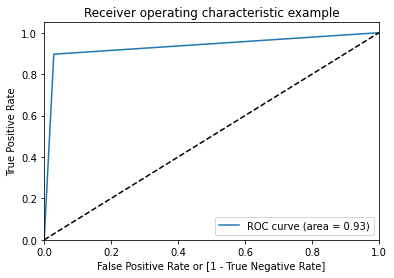

In [467]:
draw_roc(y_zip.y_train, y_zip.prediction)

In [468]:
cutt_off = [float(x/10) for x in range(0,10)]

for i in cutt_off:
    y_zip[str(i)] = y_zip.y_pred.map(lambda x : 1 if x>i else 0)
    
y_zip.head()

,y_pred,y_train,prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
320,0.985181,1,1,1,1,1,1,1,1,1,1,1,1
590,0.667902,1,1,1,1,1,1,1,1,1,0,0,0
448,0.001839,0,0,1,0,0,0,0,0,0,0,0,0
180,0.001839,0,0,1,0,0,0,0,0,0,0,0,0
611,0.998914,1,1,1,1,1,1,1,1,1,1,1,1


In [469]:
y_zip["0.0"].value_counts()

1    478
Name: 0.0, dtype: int64

In [470]:
y_zip["0.9"].value_counts()

0    346
1    132
Name: 0.9, dtype: int64

In [481]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

In [483]:
cutoff_df

,prob,accuracy,sensi,speci


In [484]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_zip.y_train, y_zip[str(i)] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.343096  1.000000  0.000000
0.1   0.1  0.914226  0.975610  0.882166
0.2   0.2  0.930962  0.945122  0.923567
0.3   0.3  0.930962  0.908537  0.942675
0.4   0.4  0.947699  0.908537  0.968153
0.5   0.5  0.945607  0.896341  0.971338
0.6   0.6  0.943515  0.884146  0.974522
0.7   0.7  0.939331  0.853659  0.984076
0.8   0.8  0.924686  0.810976  0.984076
0.9   0.9  0.916318  0.780488  0.987261


<Figure size 1296x576 with 0 Axes>

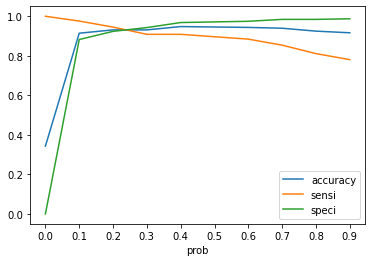

In [492]:
plt.figure(figsize=[18,8])
cutoff_df.plot.line(y=["accuracy", "sensi", "speci"], x="prob", )
# cutoff_df.plot.line(y="sensi", x="prob")
# cutoff_df.plot.line(y="speci", x="prob")
# plt.legend(['accuracy', 'sensi', 'speci'])
plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.show()

In [493]:
# Lets consider 0.23 as the optimum value.
y_final = pd.DataFrame({"y_pred":y_train_pred, "y_train": y_train})
y_final.head()

,y_pred,y_train
320,0.985181,1
590,0.667902,1
448,0.001839,0
180,0.001839,0
611,0.998914,1


In [494]:
y_final['Final_pred_class'] = y_final.y_pred.map(lambda x: 1 if x > 0.23 else 0)

In [495]:
y_final.head()

,y_pred,y_train,Final_pred_class
320,0.985181,1,1
590,0.667902,1,1
448,0.001839,0,0
180,0.001839,0,0
611,0.998914,1,1


In [496]:
confusion_matrix(y_final.Final_pred_class, y_final.y_train )

array([[295,  12],
       [ 19, 152]])

In [497]:
accuracy_score(y_final.Final_pred_class, y_final.y_train )

0.9351464435146444

In [505]:
y_test_pred = res.predict(sm.add_constant(x_test[supported_cols]))
y_test_pred = y_test_pred.values.reshape(-1)
len(y_test_pred)

205

In [507]:
y_test_final_df = pd.DataFrame({"y_test":y_test, "y_pred": y_test_pred})
y_test_final_df['prediction'] = y_test_final_df.y_pred.map(lambda x: 1 if x > 0.23 else 0)
y_test_final_df.head()

,y_test,y_pred,prediction
402,0,0.076712,0
603,1,0.991466,1
209,0,0.076712,0
561,0,0.076712,0
451,0,0.076712,0


In [508]:
confusion_matrix(y_test_final_df.prediction, y_test_final_df.y_test)

array([[118,   6],
       [ 12,  69]])

In [509]:
accuracy_score(y_test_final_df.prediction, y_test_final_df.y_test)

0.9121951219512195